# XID+PACS GAMA-12 Final Processing
The final processing stage requires:
1. Quick validation of catalogues and Bayesian Pvalue maps
2. Skewness level
3. Adding flag to catalogue

In [1]:
import seaborn as sns
from astropy.table import Table
%matplotlib inline
import numpy as np
import pylab as plt

## Read tables

In [2]:
cat=Table.read('./data/dmu26_XID+PACS_GAMA12_cat.fits')


In [3]:
cat[0:10]

help_id,RA,Dec,F_PACS_100,FErr_PACS_100_u,FErr_PACS_100_l,F_PACS_160,FErr_PACS_160_u,FErr_PACS_160_l,Bkg_PACS_100,Bkg_PACS_160,Sig_conf_PACS_100,Sig_conf_PACS_160,Rhat_PACS_100,Rhat_PACS_160,n_eff_PACS_100,n_eff_PACS_160,Pval_res_100,Pval_res_160
,degrees,degrees,mJy,mJy,mJy,mJy,mJy,mJy,mJy/Beam,mJy/Beam,mJy/Beam,mJy/Beam,,,,,,
bytes27,float64,float64,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32
HELP_J121432.117-030902.919,183.63382157907898,-3.1508107494233015,75.70131,112.128815,39.0094,37.79094,71.60728,12.37873,0.0019120458,0.00085209764,0.005851445,0.0045274105,1.000118,1.0005295,2000.0,2000.0,1.0,1.0
HELP_J121434.310-030924.907,183.64295679570182,-3.156918587503372,22.16143,53.04618,5.510331,9.974302,25.732298,2.4426153,0.0019120458,0.00085209764,0.005851445,0.0045274105,1.0012294,0.99950236,2000.0,2000.0,1.0,1.0
HELP_J121434.739-030823.565,183.64474710902638,-3.1398792424360704,117.27759,157.9577,74.98543,24.416708,50.58029,7.063667,0.0019120458,0.00085209764,0.005851445,0.0045274105,1.0015639,1.0007429,1209.0,2000.0,1.0,1.0
HELP_J121436.699-030854.782,183.6529125448977,-3.1485505277990073,12.358285,29.773819,3.519288,11.017011,25.82738,3.0218568,0.0019120458,0.00085209764,0.005851445,0.0045274105,1.0025681,0.99970424,2000.0,2000.0,1.0,1.0
HELP_J121436.723-030907.072,183.653013566119,-3.1519644483013485,12.786322,31.500149,3.1901093,5.9169617,15.769038,1.5157399,0.0019120458,0.00085209764,0.005851445,0.0045274105,1.0004998,0.99949914,2000.0,2000.0,1.0,1.0
HELP_J121437.023-030912.566,183.65426166592303,-3.153490641739616,14.582001,35.468243,3.596666,6.9653893,17.721422,1.7559798,0.0019120458,0.00085209764,0.005851445,0.0045274105,0.9993491,0.99973655,2000.0,2000.0,1.0,1.0
HELP_J121437.103-030845.936,183.6545977442613,-3.1460933434837695,33.099606,67.853874,10.472954,34.166737,70.21931,11.6283865,0.0019120458,0.00085209764,0.005851445,0.0045274105,0.9996292,0.99978167,2000.0,2000.0,1.0,1.0
HELP_J121418.939-030454.936,183.57891264844795,-3.081926791515751,8.818943,20.963072,2.4204,85.97584,120.060394,51.7531,0.0021379301,0.0017485237,0.0041515394,0.0034111247,0.999594,1.0014956,2000.0,2000.0,1.0,1.0


In [4]:
from astropy import units as u
cat['RA'].unit=u.degree
cat['Dec'].unit=u.degree

## Look at Symmetry of PDFs to determine depth level of catalogue

/home/mc741/anaconda3/envs/herschelhelp/lib/python3.8/site-packages/seaborn/axisgrid.py:1774: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "bbox" which is no longer supported as of 3.3 and will become an error two minor releases later
  self.fig.savefig(*args, **kwargs)


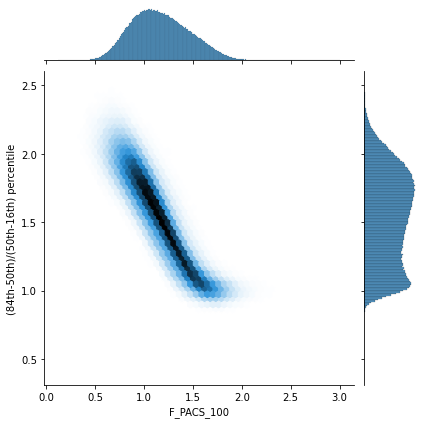

In [7]:
skew=(cat['FErr_PACS_100_u']-cat['F_PACS_100'])/(cat['F_PACS_100']-cat['FErr_PACS_100_l'])
skew.name='(84th-50th)/(50th-16th) percentile'
use = skew < 2.5 
n_use=skew> 2.5
g=sns.jointplot(x=np.log10(cat['F_PACS_100'][use]),y=skew[use], kind='hex')

g.savefig('../../data/figs/sk_PACS100_GAMA-12.png', bbox='tight')
g.savefig('../../data/figs/sk_PACS100_GAMA-12.pdf', bbox='tight')

In [8]:
10.0**1.3

19.952623149688797

For 100 $\mathrm{\mu m}$ depth is ~ 20mJy

/home/mc741/anaconda3/envs/herschelhelp/lib/python3.8/site-packages/seaborn/axisgrid.py:1774: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "bbox" which is no longer supported as of 3.3 and will become an error two minor releases later
  self.fig.savefig(*args, **kwargs)


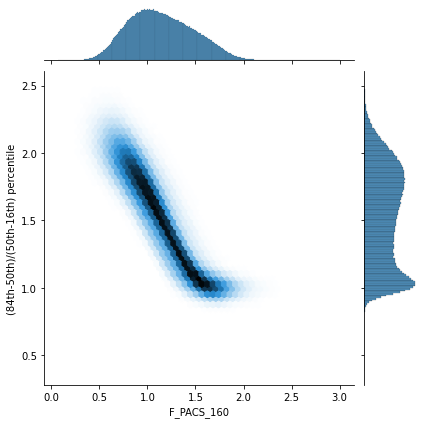

In [9]:
skew=(cat['FErr_PACS_160_u']-cat['F_PACS_160'])/(cat['F_PACS_160']-cat['FErr_PACS_160_l'])
skew.name='(84th-50th)/(50th-16th) percentile'
use = skew < 2.5
g=sns.jointplot(x=np.log10(cat['F_PACS_160'][use]),y=skew[use], kind='hex')

g.savefig('../../data/figs/sk_PACS160_GAMA-12.png', bbox='tight')
g.savefig('../../data/figs/sk_PACS160_GAMA-12.pdf', bbox='tight')

For 160 $\mathrm{\mu m}$ depth is ~ 30mJy

## Add flag to catalogue

In [8]:
from astropy.table import Column
cat.add_column(Column(np.zeros(len(cat), dtype=bool),name='flag_PACS_100'))
cat.add_column(Column(np.zeros(len(cat), dtype=bool),name='flag_PACS_160'))



In [9]:
ind_100=(cat['F_PACS_100'] < 20)
ind_160=(cat['F_PACS_160'] < 30) 


In [10]:
print(ind_100.sum(),ind_160.sum(),len(cat))

169768 158225 194276


In [11]:
cat['flag_PACS_100'][ind_100]=True
cat['flag_PACS_160'][ind_160]=True


In [12]:
cat.write('./data/dmu26_XID+PACS_GAMA-12_cat_20200210.fits', format='fits',overwrite=True)
